In [1]:
#Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
#Importing Training Data

#Training Dataset is uploaded in  github repository to not require manual dowloading and adjusting of data path
churn_train_url = "https://raw.githubusercontent.com/PyroGiel/churn/master/churn_train.csv"
churn_train = pd.read_csv(churn_train_url)

In [3]:
#Exploring Training Data

print(churn_train.shape)
print(churn_train.columns)
churn_train.head(20)

(4000, 21)
Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')


,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,45.0,106,1.0,1395,0.0,0.0,0,235.2,121,39.98,...,87,18.75,236.3,91,10.63,11.8,4.0,3.19,1.0,0
1,44.0,51,0.0,4191,0.0,1.0,0,212.9,80,36.19,...,57,20.07,187.6,99,8.44,8.8,4.0,2.38,2.0,0
2,10.0,64,2.0,4508,0.0,0.0,0,216.9,78,36.87,...,115,17.94,179.8,116,8.09,11.4,5.0,3.08,3.0,0
3,31.0,59,2.0,1041,1.0,1.0,31,225.0,78,38.25,...,79,16.26,226.7,79,10.20,9.1,3.0,2.46,NaN,0
4,8.0,136,1.0,1349,0.0,0.0,0,101.7,105,17.29,...,99,17.24,136.2,119,6.13,9.4,6.0,2.54,3.0,0
5,22.0,142,0.0,3717,0.0,0.0,0,245.1,66,41.67,...,109,12.29,227.3,112,10.23,3.1,4.0,0.84,1.0,0
6,19.0,62,1.0,3051,1.0,0.0,0,159.7,86,27.15,...,76,16.79,121.6,105,5.47,13.9,NaN,3.75,0.0,1
7,6.0,73,2.0,4811,0.0,0.0,0,159.0,123,27.03,...,95,19.83,178.9,155,8.05,15.2,3.0,4.10,2.0,0
8,20.0,139,1.0,2926,0.0,0.0,0,102.2,76,17.37,...,106,19.55,183.4,136,8.25,10.8,4.0,2.92,1.0,0
9,14.0,65,1.0,3611,0.0,0.0,0,180.3,84,30.65,...,129,16.99,280.1,62,12.60,12.1,1.0,3.27,3.0,0


The Dataset contains of 4000 rows and 21 collumns.

Here we shall see a brief explanation of the variables present in the Churn data.<br>
State. Column representing the states in the US.<br>
Account Length. How long the account has been active.<br> 
Area Code. Area ID. <br>
Phone Number. Surrogate for Customer ID. <br>
International Plan. Whether present (1) or not (0). <br> 
Voice Mail Plan. Present (1) or not (0). <br>
Number of Voice Mail Messages. Number of messages in voice mail. <br>
Total Day Minutes. Minutes customer used service during the day. <br>
Total Day Calls. Number of daily calls. <br>
Total Day Charge. Daily cost of the customer. <br>
Total Eve Minutes. Minutes customer used service during the evening. <br>
Total Eve Calls. Number of evening calls. <br>
Total Eve Charge. Evening cost of the customer. <br>
Total Night Minutes. Minutes customer used service during the night. <br>
Total Night Calls. Number of night calls. <br>
Total Night Charge. Night cost of the customer. <br>
Total International Minutes. Minutes customer used service to make international calls. <br>
Total International Calls. Number of international calls. <br>
Total International Charge. International service costs of the customer. <br>
Number Customer Service Calls. Number of calls of the customer to the customer service.<br> 
Churn (class). 0 = No churn; 1 = Churn.<br>


0    3434
1     566
Name: churn, dtype: int64
churn pct:  0.1415


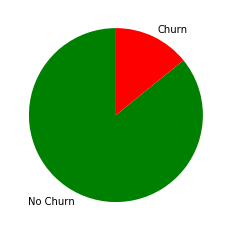

In [4]:
#First look at distribution of classifier churn
churn_counts = churn_train['churn'].value_counts()
print(churn_counts)

plt.pie(churn_counts, labels=['No Churn', 'Churn'], colors=['g', 'r'], startangle=90)

churn_pct = 566 /(3434+566)
print('churn pct: ', churn_pct)

Transforming Data:

In [5]:
#phone_number can be dropped. It doesn't affect prediction and might be sensitive.
churn_train.drop(['phone_number'], axis=1, inplace=True)

In [6]:
#check for missing values
churn_train.isna().sum(axis=1).sum(), churn_train.isna().sum()

(1604,
 state                               0
 account_length                      0
 area_code                         189
 international_plan                  0
 voice_mail_plan                     0
 number_vmail_messages               0
 total_day_minutes                   0
 total_day_calls                     0
 total_day_charge                    0
 total_eve_minutes                   0
 total_eve_calls                     0
 total_eve_charge                    0
 total_night_minutes                 0
 total_night_calls                   0
 total_night_charge                  0
 total_intl_minutes                  0
 total_intl_calls                 1076
 total_intl_charge                   0
 number_customer_service_calls     339
 churn                               0
 dtype: int64)

There are a lot of missing values: 1604.<br>
This means these rows.<br>
To decide what to do with these values, one looks at the specific collumns.

mean:  4.448358413132695
median:  4.0
mode:  ModeResult(mode=array([3.]), count=array([584]))


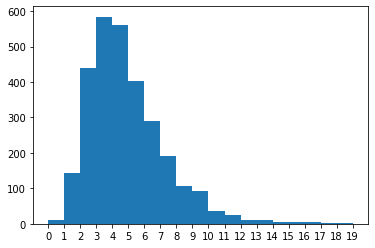

In [7]:
#Total International Calls

#Data with missing values dropped
intl_calls_nonans = churn_train['total_intl_calls'].dropna()

plt.xticks(np.arange(21))
plt.hist(intl_calls_nonans, bins=np.unique(intl_calls_nonans))

print('mean: ', np.mean(intl_calls_nonans))
print('median: ', np.median(intl_calls_nonans))
print('mode: ', stats.mode(intl_calls_nonans))

Distribution:  3.0     0.199726
4.0     0.191518
2.0     0.150137
5.0     0.137483
6.0     0.099179
7.0     0.064979
1.0     0.049248
8.0     0.036936
9.0     0.031806
10.0    0.012312
11.0    0.008208
0.0     0.004104
12.0    0.003762
13.0    0.003762
16.0    0.002052
14.0    0.001710
15.0    0.001710
18.0    0.000684
17.0    0.000342
19.0    0.000342
Name: total_intl_calls, dtype: float64


(array([ 19., 191., 600., 813., 767., 535., 387., 272., 150., 123.,  52.,
         34.,  15.,  15.,   7.,   6.,   8.,   2.,   4.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19.]),
 <a list of 19 Patch objects>)

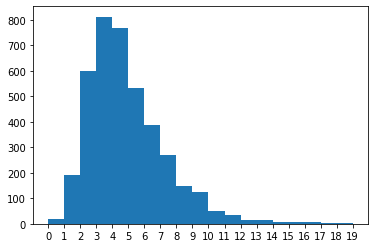

In [8]:
#Because there are over 1000 missing values, filling nans with 1 specific value would ruin the data
#The missing values should be replaced approximately to the current distribution (EXCEPT TOTAL MIN=0?)
intl_calls_distr = intl_calls_nonans.value_counts(normalize=True)
print('Distribution: ', intl_calls_distr)


intl_calls_missing = churn_train['total_intl_calls'].isnull()
churn_train.loc[intl_calls_missing,'total_intl_calls'] = np.random.choice(intl_calls_distr.index, size=len(churn_train[intl_calls_missing]), p=intl_calls_distr.values)


plt.xticks(np.arange(21))
plt.hist(churn_train['total_intl_calls'], bins=np.unique(churn_train['total_intl_calls']))

In [9]:
churn_train.isna().sum()

state                              0
account_length                     0
area_code                        189
international_plan                 0
voice_mail_plan                    0
number_vmail_messages              0
total_day_minutes                  0
total_day_calls                    0
total_day_charge                   0
total_eve_minutes                  0
total_eve_calls                    0
total_eve_charge                   0
total_night_minutes                0
total_night_calls                  0
total_night_charge                 0
total_intl_minutes                 0
total_intl_calls                   0
total_intl_charge                  0
number_customer_service_calls    339
churn                              0
dtype: int64

mean:  1.5632340890467085
median:  1.0
mode:  ModeResult(mode=array([1.]), count=array([1297]))


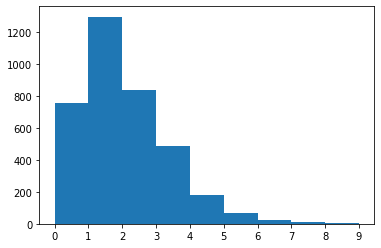

In [10]:
#Total Cus Service Calls

#Data with missing values dropped
cs_calls_nonans = churn_train['number_customer_service_calls'].dropna()

plt.xticks(np.arange(10))
plt.hist(cs_calls_nonans, bins=np.unique(cs_calls_nonans))

print('mean: ', np.mean(cs_calls_nonans))
print('median: ', np.median(cs_calls_nonans))
print('mode: ', stats.mode(cs_calls_nonans))

Distribution:  1.0    0.354275
2.0    0.229172
0.0    0.205955
3.0    0.133570
4.0    0.049167
5.0    0.018301
6.0    0.006282
7.0    0.002458
8.0    0.000546
9.0    0.000273
Name: number_customer_service_calls, dtype: float64


(array([ 821., 1439.,  906.,  533.,  192.,   72.,   25.,    9.,    3.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 9 Patch objects>)

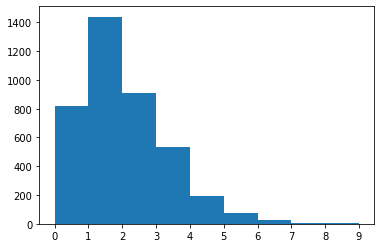

In [11]:
#Previous method worked well, so it is reused here
cs_calls_distr = cs_calls_nonans.value_counts(normalize=True)
print('Distribution: ', cs_calls_distr)


cs_calls_missing = churn_train['number_customer_service_calls'].isnull()
churn_train.loc[cs_calls_missing,'number_customer_service_calls'] = np.random.choice(cs_calls_distr.index, size=len(churn_train[cs_calls_missing]), p=cs_calls_distr.values)


plt.xticks(np.arange(10))
plt.hist(churn_train['number_customer_service_calls'], bins=np.unique(churn_train['number_customer_service_calls']))

In [12]:
churn_train.isna().sum()

state                              0
account_length                     0
area_code                        189
international_plan                 0
voice_mail_plan                    0
number_vmail_messages              0
total_day_minutes                  0
total_day_calls                    0
total_day_charge                   0
total_eve_minutes                  0
total_eve_calls                    0
total_eve_charge                   0
total_night_minutes                0
total_night_calls                  0
total_night_charge                 0
total_intl_minutes                 0
total_intl_calls                   0
total_intl_charge                  0
number_customer_service_calls      0
churn                              0
dtype: int64

In [13]:
#Area code is either 0, 1 or 2.
#whole collumn can be removed without influencing predictions.

churn_train.drop(['area_code'], axis=1, inplace=True)
churn_train.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,45.0,106,0.0,0.0,0,235.2,121,39.98,220.6,87,18.75,236.3,91,10.63,11.8,4.0,3.19,1.0,0
1,44.0,51,0.0,1.0,0,212.9,80,36.19,236.1,57,20.07,187.6,99,8.44,8.8,4.0,2.38,2.0,0
2,10.0,64,0.0,0.0,0,216.9,78,36.87,211.0,115,17.94,179.8,116,8.09,11.4,5.0,3.08,3.0,0
3,31.0,59,1.0,1.0,31,225.0,78,38.25,191.3,79,16.26,226.7,79,10.20,9.1,3.0,2.46,0.0,0
4,8.0,136,0.0,0.0,0,101.7,105,17.29,202.8,99,17.24,136.2,119,6.13,9.4,6.0,2.54,3.0,0


In [14]:
#Look if all dtypes are appropriate 
print(churn_train.dtypes)

#state, total_intl_calls, number_customer_service_calls from float to int
churn_train.state = churn_train.state.astype(int)
churn_train.total_intl_calls = churn_train.total_intl_calls.astype(int)
churn_train.number_customer_service_calls = churn_train.number_customer_service_calls.astype(int)


#international_plan, voice_mail_plan from float to boolean
churn_train.international_plan = churn_train.international_plan.astype(int)
churn_train.voice_mail_plan = churn_train.voice_mail_plan.astype(int)

churn_train.head()

state                            float64
account_length                     int64
international_plan               float64
voice_mail_plan                  float64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                 float64
total_intl_charge                float64
number_customer_service_calls    float64
churn                              int64
dtype: object


,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,45,106,0,0,0,235.2,121,39.98,220.6,87,18.75,236.3,91,10.63,11.8,4,3.19,1,0
1,44,51,0,1,0,212.9,80,36.19,236.1,57,20.07,187.6,99,8.44,8.8,4,2.38,2,0
2,10,64,0,0,0,216.9,78,36.87,211.0,115,17.94,179.8,116,8.09,11.4,5,3.08,3,0
3,31,59,1,1,31,225.0,78,38.25,191.3,79,16.26,226.7,79,10.20,9.1,3,2.46,0,0
4,8,136,0,0,0,101.7,105,17.29,202.8,99,17.24,136.2,119,6.13,9.4,6,2.54,3,0


Prediction:

In [15]:
#Create train & test Data

y = churn_train["churn"].values
X = churn_train.drop(labels = ["churn"],axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [16]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
model_logreg = LogisticRegression(max_iter=2000)
result = model_logreg.fit(X_train, y_train)

from sklearn import metrics
prediction_test = model_logreg.predict(X_test)

# Print the prediction accuracy and AUC-Score
print (metrics.accuracy_score(y_test, prediction_test))
print(metrics.roc_auc_score(y_test, prediction_test))

#Get weights of all variables
weights = pd.Series(model_logreg.coef_[0],
 index=X.columns.values)
weights.sort_values(ascending = False)

0.85375
0.6004444444444444


international_plan               2.120271
number_customer_service_calls    0.491355
total_intl_minutes               0.112705
total_intl_charge                0.016887
total_day_minutes                0.015688
total_eve_minutes                0.007460
total_night_minutes              0.005371
total_day_calls                  0.004314
account_length                   0.001194
total_eve_calls                  0.000350
state                           -0.000422
total_eve_charge                -0.000547
number_vmail_messages           -0.000758
total_night_calls               -0.002157
total_day_charge                -0.011100
total_night_charge              -0.013170
total_intl_calls                -0.050255
voice_mail_plan                 -1.015162
dtype: float64

In [17]:
#NaiveBayes
from sklearn.naive_bayes import GaussianNB

model_gaussiannb = GaussianNB()
result = model_gaussiannb.fit(X_train, y_train)

prediction_test = model_gaussiannb.predict(X_test)

# Print the prediction accuracy and AUC-Score
print (metrics.accuracy_score(y_test, prediction_test))
print(metrics.roc_auc_score(y_test, prediction_test))

0.85875
0.7142222222222221


In [18]:
#NearestNeighbours
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier(n_neighbors=3)
result = model_KNN.fit(X_train, y_train)

prediction_test = model_KNN.predict(X_test)

# Print the prediction accuracy and AUC-Score
print (metrics.accuracy_score(y_test, prediction_test))
print(metrics.roc_auc_score(y_test, prediction_test))

0.88
0.6616296296296296


In [19]:
#MLP Classifier
from sklearn.neural_network import MLPClassifier

model_MLP = MLPClassifier()
result = model_MLP.fit(X_train, y_train)

prediction_test = model_MLP.predict(X_test)

# Print the prediction accuracy and AUC-Score
print (metrics.accuracy_score(y_test, prediction_test))
print(metrics.roc_auc_score(y_test, prediction_test))

0.845
0.6245925925925926


In [20]:
#Tree Classifier
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()
result = model_tree.fit(X_train, y_train)

prediction_test = model_tree.predict(X_test)

# Print the prediction accuracy and AUC-Score
print (metrics.accuracy_score(y_test, prediction_test))
print(metrics.roc_auc_score(y_test, prediction_test))

0.89375
0.7838518518518519
